In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Data science/Desafío Latam/Análisis Estadístico con Python/baby.csv')
df.head()

,Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight,Maternal.Smoker
0,1,120,284,27,62,100,False
1,2,113,282,33,64,135,False
2,3,128,279,28,64,115,True
3,4,108,282,23,67,125,True
4,5,136,286,25,62,93,False


# 1. Realiza una exploración de los datos, considerando sus tipos y los descriptivos correspondientes

De acuerdo a la descripcion de los datos, podemos observar que existen 1174 bebé.

Peso de nacimiento: este tiene un mínimo de 55 y máximo de 176. Un promedio de 119.5.

Días de Gestación: mínimo de 148 y un máximo de 353 días. un promedio de 279 días.

Edad de la madre. con un mínimo de 15 y un  máximo de 45 años. Un promedio de 27.2.

Altura de la madre: mínimo de 53 y máximo de 72.Un promedio de 64.

Peso de la madre embarazada: un peso mínimo de 87 y un peso máximo de 250. Un promedio de 128.5.



Las columnas en el dataset se encuentran en un formato adecuado para trabajar

In [3]:
df.dtypes

Unnamed: 0                   int64
Birth.Weight                 int64
Gestational.Days             int64
Maternal.Age                 int64
Maternal.Height              int64
Maternal.Pregnancy.Weight    int64
Maternal.Smoker               bool
dtype: object

**No hay valores nulos**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Unnamed: 0                 1174 non-null   int64
 1   Birth.Weight               1174 non-null   int64
 2   Gestational.Days           1174 non-null   int64
 3   Maternal.Age               1174 non-null   int64
 4   Maternal.Height            1174 non-null   int64
 5   Maternal.Pregnancy.Weight  1174 non-null   int64
 6   Maternal.Smoker            1174 non-null   bool 
dtypes: bool(1), int64(6)
memory usage: 56.3 KB


In [5]:
df.describe()

,Unnamed: 0,Birth.Weight,Gestational.Days,Maternal.Age,Maternal.Height,Maternal.Pregnancy.Weight
count,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000,1174.000000
mean,587.500000,119.462521,279.101363,27.228279,64.049404,128.478705
std,339.048915,18.328671,16.010305,5.817839,2.526102,20.734282
min,1.000000,55.000000,148.000000,15.000000,53.000000,87.000000
25%,294.250000,108.000000,272.000000,23.000000,62.000000,114.250000
50%,587.500000,120.000000,280.000000,26.000000,64.000000,125.000000
75%,880.750000,131.000000,288.000000,31.000000,66.000000,139.000000
max,1174.000000,176.000000,353.000000,45.000000,72.000000,250.000000


In [6]:
df.shape

(1174, 7)

# 2. Considera los pesos de los bebés. ¿Se puede decir que siguen una distribución normal? Justifica tu respuesta creando los gráficos y modelos necesarios.


Si se puede decir que la distribución de los datos de los pesos de los bebés siguen una distribución normal, lo cuál se ve en el gráfico de distribución, donde se ve una distrinución con forma de campana simétrica. Además la cantidad de datos a la izquierda y derecha de los picos es similar.

Además, en el gráfico de boxplot, vemos un grpafico simétrico, donde, la mediana (línea dentro de la caja) está aproximadamente en el centro de la caja, y los extremos de los bigotes están aproximadamente equidistantes de la mediana.
Además vemos pocos valores atípicos.

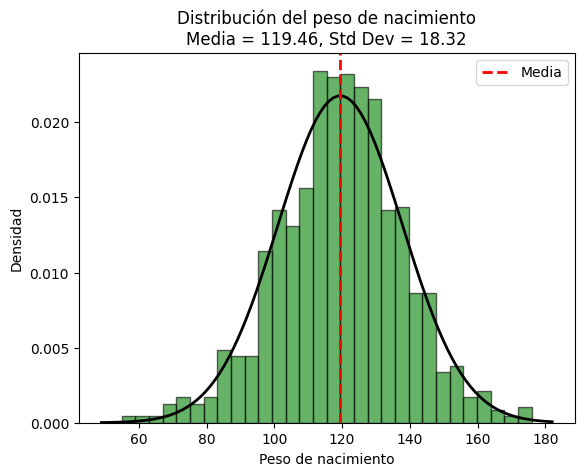

In [17]:
# Gráfico con la densidad
import scipy.stats as stats

# Calcular la media y la desviación estándar
media = np.mean(df['Birth.Weight'])
std_dev = np.std(df['Birth.Weight'])

plt.hist(df['Birth.Weight'], bins=30, edgecolor='k', density=True, alpha=0.6, color='g')

# Crear la curva normal
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, media, std_dev)

# Dibujar la curva normal sobre el histograma
plt.plot(x, p, 'k', linewidth=2)
title = "Distribución del peso de nacimiento\nMedia = {:.2f}, Std Dev = {:.2f}".format(media, std_dev)
plt.title(title)
plt.axvline(x=media, color='red', linestyle='dashed', linewidth=2, label='Media')
plt.xlabel('Peso de nacimiento')
plt.ylabel('Densidad')
plt.legend()
plt.show()


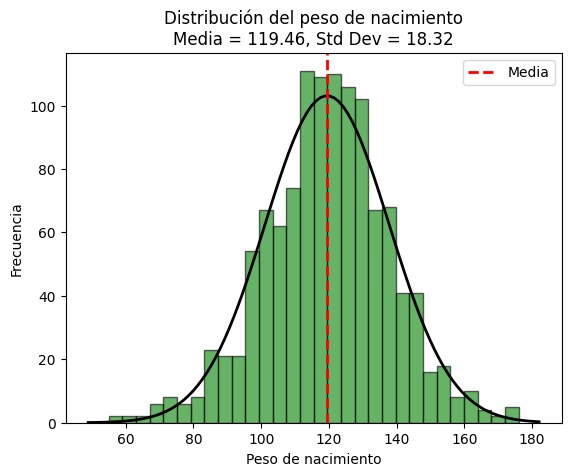

In [19]:
# Calcular la media y la desviación estándar
media = np.mean(df['Birth.Weight'])
std_dev = np.std(df['Birth.Weight'])

n, bins, patches = plt.hist(df['Birth.Weight'], bins=30, edgecolor='k', alpha=0.6, color='g')

# Crear la curva normal escalada a las frecuencias del histograma
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, media, std_dev)
p = p * (bins[1] - bins[0]) * len(df['Birth.Weight'])

# Dibujar la curva normal sobre el histograma
plt.plot(x, p, 'k', linewidth=2)
title = "Distribución del peso de nacimiento\nMedia = {:.2f}, Std Dev = {:.2f}".format(media, std_dev)
plt.title(title)
plt.axvline(x=media, color='red', linestyle='dashed', linewidth=2, label='Media')
plt.xlabel('Peso de nacimiento')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

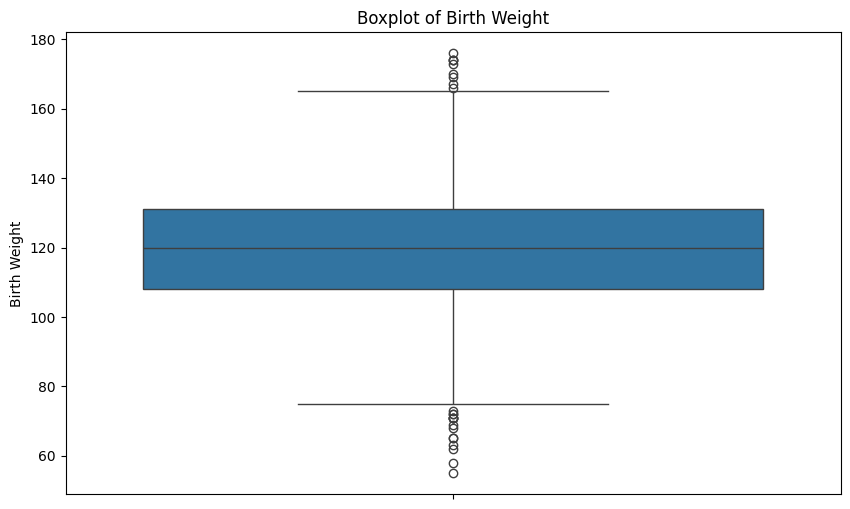

In [8]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Birth.Weight'])
plt.ylabel('Birth Weight')
plt.title('Boxplot of Birth Weight')
plt.show()

# 3. Considerando lo anterior, verifica el modelo de distribución normal de los pesos para 5 valores diferentes. Compara con los datos reales.

In [11]:
mean_weight = df['Birth.Weight'].mean()
std_weight = df['Birth.Weight'].std()

sorted_weights = df['Birth.Weight'].sort_values().reset_index(drop=True)

# Seleccionar posiciones específicas
positions = [int(len(sorted_weights) * p) for p in [0.1, 0.3, 0.5, 0.7, 0.9]]

# Seleccionar los valores experimentales correspondientes a estas posiciones
experimental_weights = sorted_weights.iloc[positions]

# Generar los valores teóricos correspondientes a estas posiciones en la distribución normal
percentiles = [0.1, 0.3, 0.5, 0.7, 0.9]
theoretical_weights = norm.ppf(percentiles, loc=mean_weight, scale=std_weight)

# Comparar
comparison = pd.DataFrame({
    'Experimental Weights': experimental_weights.values,
    'Theoretical Weights': theoretical_weights
})

print(comparison)

   Experimental Weights  Theoretical Weights
0                    97            95.973384
1                   111           109.850957
2                   120           119.462521
3                   129           129.074086
4                   142           142.951659


# 4. Compara los pesos de los bebés de madres fumadoras y no fumadoras. ¿Qué diferencias existen? Explica y construye los modelos correspondientes.

Comparación y Observaciones:
Media (mean):

La media del peso de los bebés de madres fumadoras (113.82) es menor que la de los bebés de madres no fumadoras (123.09). Esto sugiere que, en promedio, los bebés de madres fumadoras tienden a pesar menos al nacer.

Mediana (50%):

La mediana también es menor para los bebés de madres fumadoras (115) en comparación con los bebés de madres no fumadoras (123). La mediana es un indicador robusto del centro de la distribución y confirma la observación de que los bebés de madres fumadoras pesan menos.

Desviación estándar (std):

La desviación estándar es ligeramente mayor en los bebés de madres fumadoras (18.30) en comparación con los bebés de madres no fumadoras (17.42). Esto indica que hay una variabilidad ligeramente mayor en los pesos de los bebés de madres fumadoras.

Percentiles:

Los percentiles también muestran una tendencia similar:
El percentil 25 es 101 para fumadoras y 113 para no fumadoras.
El percentil 75 es 126 para fumadoras y 134 para no fumadoras.
Estos percentiles refuerzan la observación de que los bebés de madres fumadoras tienden a tener pesos más bajos en comparación con los de madres no fumadoras en todos los puntos de la distribución.

Rangos (min y max):

Aunque los rangos de pesos (min y max) son similares en ambos grupos, los valores extremos no afectan significativamente las medias y medianas observadas, indicando que las diferencias no se deben a outliers extremos sino a una tendencia general en la distribución.

**Conclusión: En general los bebes de madres fumadoras pesan menos.**

In [ ]:
# Separar los datos en dos grupos
smokers = df[df['Maternal.Smoker'] == True]
non_smokers = df[df['Maternal.Smoker'] == False]

# Ver las estadísticas descriptivas
print("Estadísticas descriptivas para bebés de madres fumadoras:")
print(smokers['Birth.Weight'].describe())

print("\nEstadísticas descriptivas para bebés de madres no fumadoras:")
print(non_smokers['Birth.Weight'].describe())


Estadísticas descriptivas para bebés de madres fumadoras:
count    459.000000
mean     113.819172
std       18.295010
min       58.000000
25%      101.000000
50%      115.000000
75%      126.000000
max      163.000000
Name: Birth.Weight, dtype: float64

Estadísticas descriptivas para bebés de madres no fumadoras:
count    715.000000
mean     123.085315
std       17.423695
min       55.000000
25%      113.000000
50%      123.000000
75%      134.000000
max      176.000000
Name: Birth.Weight, dtype: float64


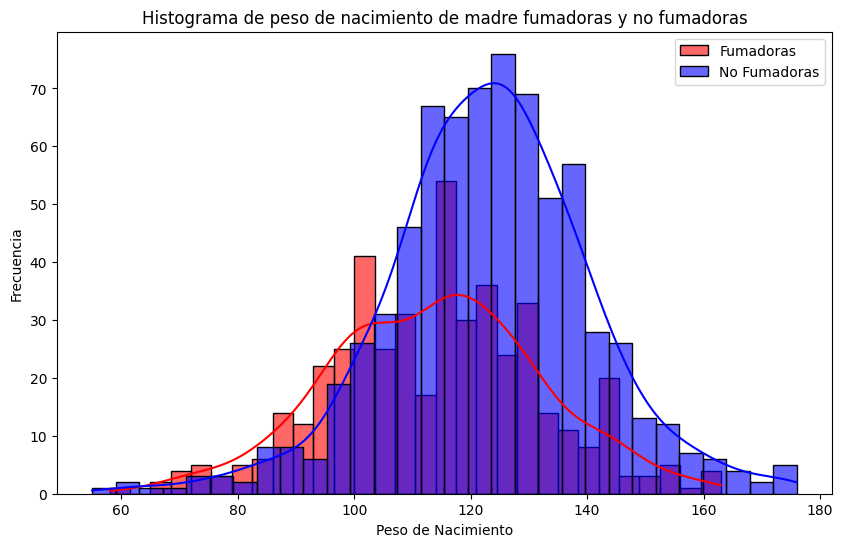

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(smokers['Birth.Weight'], kde=True, bins=30, color='red', label='Fumadoras', alpha=0.6)
sns.histplot(non_smokers['Birth.Weight'], kde=True, bins=30, color='blue', label='No Fumadoras', alpha=0.6)
plt.xlabel('Peso de Nacimiento')
plt.ylabel('Frecuencia')
plt.title('Histograma de peso de nacimiento de madre fumadoras y no fumadoras')
plt.legend()
plt.show()

# 5. Considerando los datos dados:

## ● Calcula la probabilidad de que una madre escogida al azar fume.

In [20]:
df.shape[0]

1174

In [21]:
total_madres = df.shape[0]
madres_fumadoras =df[df['Maternal.Smoker']== True]['Maternal.Smoker'].count()  # Número de madres que fuman

In [22]:
madres_fumadoras

459

In [23]:
p_fuma = madres_fumadoras / total_madres
print("Probabilidad de que una madre fume:", p_fuma )

Probabilidad de que una madre fume: 0.3909710391822828


## ● A partir del valor anterior, construye un modelo de distribución binomial que modele el experimento correspondiente a escoger 5 madres al azar y observar cuántas fuman.

## ● Utilizando este modelo, simula 1000 muestras de tamaño 8, y calcula sus medias muestrales.


In [61]:
import scipy.stats as stats

p = p_fuma # Probabilidad de éxito
k = 5  # Número de mujeres

valores = np.random.binomial(k, p, size = 8)
prom = valores.mean()
print(valores)
print(prom)

[0 1 1 2 2 1 2 2]
1.375


In [143]:
# repetir lo anterior pero con un bucle de 1000 muestras
medias_muestrales_teoricas = []
serie = []
for i in range(1000):
  valores = np.random.binomial(k, p, size = 8)
  prom = valores.mean()
  medias_muestrales_teoricas.append(prom)
  serie.append(i)
print(serie[:10])
print(medias_muestrales_teoricas[:10])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[1.75, 1.875, 2.125, 2.25, 2.125, 2.25, 2.125, 1.5, 1.75, 2.375]


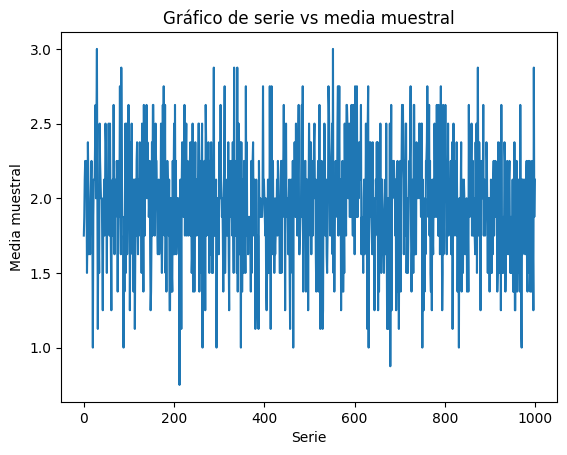

In [144]:
plt.plot(serie, medias_muestrales_teoricas)  # Crea la línea del gráfico
plt.xlabel("Serie")
plt.ylabel("Media muestral")
plt.title("Gráfico de serie vs media muestral")
plt.show()

## ● Utilizando los datos directamente, extrae 1000 muestras de tamaño 8 y calcula sus respectivas medias muestrales.


In [75]:
df['Maternal.Smoker'].sample(1000)

386    False
698    False
440    False
491     True
284     True
Name: Maternal.Smoker, dtype: bool

In [93]:
# Tomar una muestra aleatoria de 5 filas
muestra_aleatoria = df['Maternal.Smoker'].sample(5)
print(muestra_aleatoria)
# Contar el número de valores 'True' en la muestra
numero_fumadores = (muestra_aleatoria == True).sum()
print(numero_fumadores)

824     False
1112     True
296     False
390      True
642     False
Name: Maternal.Smoker, dtype: bool
2


In [104]:
import numpy as np
primer_experimento =[]
for i in range(8):
  muestra_aleatoria = df['Maternal.Smoker'].sample(5)
  print(muestra_aleatoria)
  numero_fumadores = (muestra_aleatoria == True).sum()
  print(numero_fumadores)
  primer_experimento.append(numero_fumadores)
print(primer_experimento)
prom = np.array(primer_experimento).mean()
print(prom)

732    False
163     True
531     True
241    False
801     True
Name: Maternal.Smoker, dtype: bool
3
1032     True
835     False
40      False
625      True
1166    False
Name: Maternal.Smoker, dtype: bool
2
882     False
1001     True
589     False
651     False
2        True
Name: Maternal.Smoker, dtype: bool
2
201     True
606    False
679    False
653     True
796     True
Name: Maternal.Smoker, dtype: bool
3
43     False
529    False
688     True
271     True
904    False
Name: Maternal.Smoker, dtype: bool
2
1158    False
995     False
135     False
62       True
463      True
Name: Maternal.Smoker, dtype: bool
2
106     True
297    False
224     True
726    False
704    False
Name: Maternal.Smoker, dtype: bool
2
655     True
853    False
171    False
128     True
78     False
Name: Maternal.Smoker, dtype: bool
2
[3, 2, 2, 3, 2, 2, 2, 2]
2.25


In [134]:
#ahora repetir lo anterior 10 veces
medias_muestrales_empiricas =[]
series = []
for j in range(10):
  print(experimentos)
  experimentos =[]
  for i in range(8):
    muestra_aleatoria = df['Maternal.Smoker'].sample(5)
    numero_fumadores = (muestra_aleatoria == True).sum()
    experimentos.append(numero_fumadores)
  series.append(j)
  prom= np.array(experimentos).mean()
  medias_muestrales_empiricas.append(prom)
  print(medias_muestrales_empiricas)
print(len(medias_muestrales_empiricas))


[1, 2, 1, 1, 3, 2, 1, 4]
[1.875]
[0, 2, 3, 1, 1, 3, 2, 3]
[1.875, 2.5]
[2, 1, 2, 3, 4, 3, 3, 2]
[1.875, 2.5, 2.625]
[4, 1, 3, 4, 2, 2, 2, 3]
[1.875, 2.5, 2.625, 1.625]
[2, 3, 2, 1, 1, 1, 1, 2]
[1.875, 2.5, 2.625, 1.625, 1.75]
[2, 0, 2, 4, 1, 1, 3, 1]
[1.875, 2.5, 2.625, 1.625, 1.75, 1.75]
[1, 2, 2, 1, 2, 3, 1, 2]
[1.875, 2.5, 2.625, 1.625, 1.75, 1.75, 2.0]
[1, 3, 3, 3, 3, 0, 2, 1]
[1.875, 2.5, 2.625, 1.625, 1.75, 1.75, 2.0, 1.5]
[2, 1, 1, 1, 2, 1, 2, 2]
[1.875, 2.5, 2.625, 1.625, 1.75, 1.75, 2.0, 1.5, 2.25]
[2, 2, 2, 1, 3, 3, 1, 4]
[1.875, 2.5, 2.625, 1.625, 1.75, 1.75, 2.0, 1.5, 2.25, 2.625]
10


In [135]:
#ahora repetir lo anterior 1000 veces
medias_muestrales_empiricas =[]
series = []
for j in range(1000):
  experimentos =[]
  for i in range(8):
    muestra_aleatoria = df['Maternal.Smoker'].sample(5)
    numero_fumadores = (muestra_aleatoria == True).sum()
    experimentos.append(numero_fumadores)
  series.append(j)
  prom= np.array(experimentos).mean()
  medias_muestrales_empiricas.append(prom)
print(len(medias_muestrales_empiricas))

1000


In [136]:
series[:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [137]:
medias_muestrales_empiricas[:10]

[2.5, 2.5, 2.25, 1.75, 2.625, 2.0, 1.375, 3.0, 2.25, 2.25]

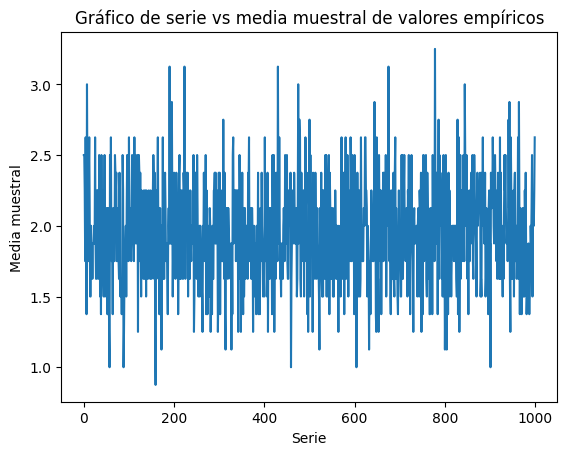

In [138]:
plt.plot(series, medias_muestrales_empiricas)
plt.xlabel("Serie")
plt.ylabel("Media muestral")
plt.title("Gráfico de serie vs media muestral de valores empíricos")
plt.show()


## ● compara gráficamente los resultados obtenidos anteriormente

## ● verifica el teorema del límite central, considerando las muestras de datos reales y las simuladas con el modelo binomial.

De acuerdo a los histogramas graficados se puede observar que el teorema del límite central se cumple ya que la distribución de medias muestrales teóricas y empíricas se acercan a una distribución normal.


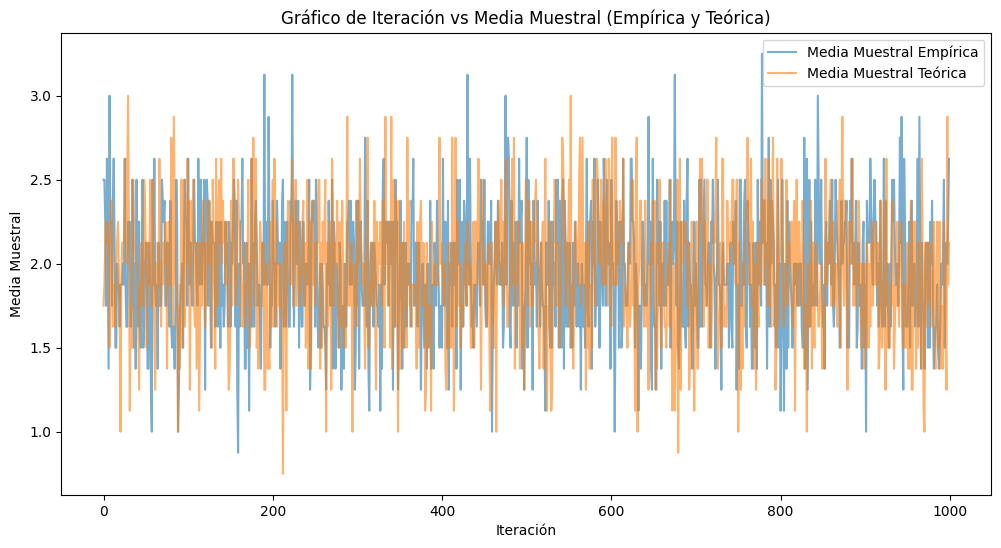

In [145]:
# Graficar ambas curvas
plt.figure(figsize=(12, 6))
plt.plot(series, medias_muestrales_empiricas, label='Media Muestral Empírica', alpha=0.6)
plt.plot(series, medias_muestrales_teoricas, label='Media Muestral Teórica', alpha=0.6)
plt.xlabel('Iteración')
plt.ylabel('Media Muestral')
plt.title('Gráfico de Iteración vs Media Muestral (Empírica y Teórica)')
plt.legend()
plt.show()

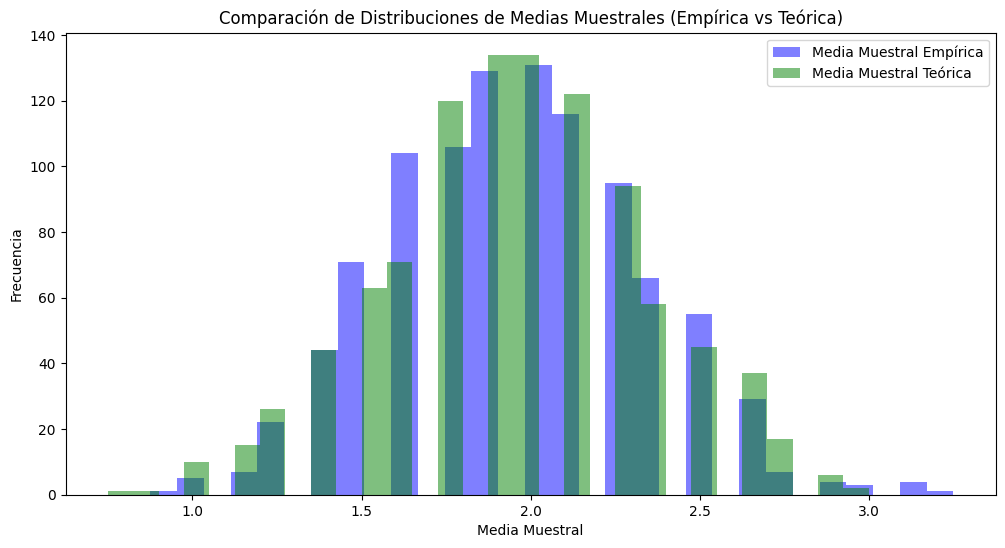

In [150]:
# Graficar histogramas superpuestos para comparar las distribuciones
plt.figure(figsize=(12, 6))
plt.hist(medias_muestrales_empiricas, bins=30, alpha=0.5, label='Media Muestral Empírica', color='blue')
plt.hist(medias_muestrales_teoricas, bins=30, alpha=0.5, label='Media Muestral Teórica', color='green')
plt.xlabel('Media Muestral')
plt.ylabel('Frecuencia')
plt.title('Comparación de Distribuciones de Medias Muestrales (Empírica vs Teórica)')
plt.legend()
plt.show()

## * construye un modelo de distribución normal derivado del modelo binomial, y grafícalo junto a los anteriores para comparar. Concluye

 Hay una similitud entre las distribuciones binomial empírica y teórica sugiere que el modelo binomial es adecuado para describir tus datos, mientras que la diferencia con la distribución normal puede deberse a las características inherentes de cada distribución y al tamaño de la muestra utilizado. Si se tomara un tamaño de muestra mayor para el modelo binomial se podría acercar más al modelo normal.

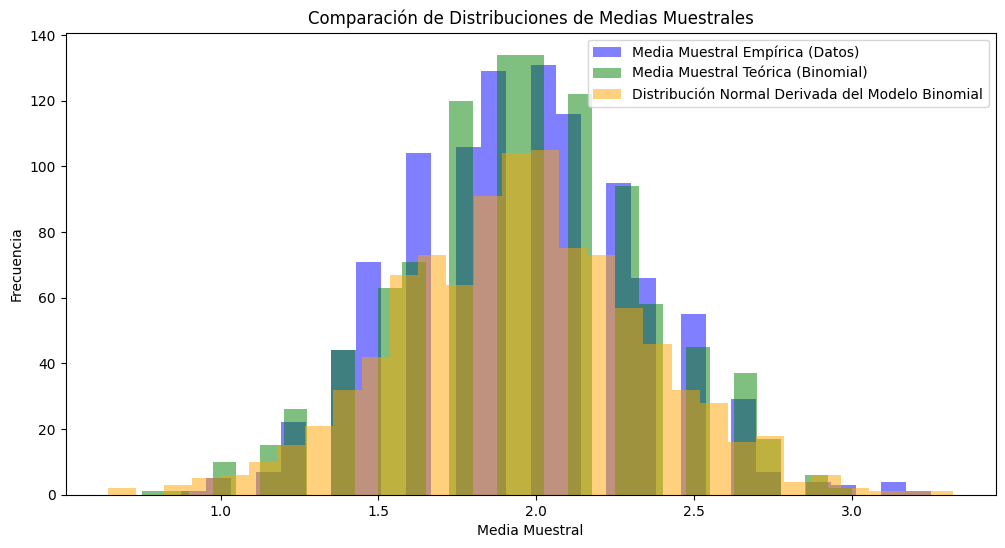

In [163]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

p = 0.3909710391822828
k = 5
tamaño_muestra = 8
n_iteraciones = 1000

# Calcular la media y la varianza de la distribución binomial
media_binomial = k * p
varianza_binomial = k * p * (1 - p)

# Utilizar el teorema del límite central para obtener los parámetros de la distribución normal
media_normal = media_binomial
varianza_normal = varianza_binomial / tamaño_muestra

# Crear la distribución normal
dist_normal = stats.norm(media_normal, np.sqrt(varianza_normal))
datos_normal = dist_normal.rvs(size=n_iteraciones)

# Graficar histogramas
plt.figure(figsize=(12, 6))
plt.hist(medias_muestrales_empiricas, bins=30, alpha=0.5, label='Media Muestral Empírica (Datos)', color='blue')
plt.hist(medias_muestrales_teoricas, bins=30, alpha=0.5, label='Media Muestral Teórica (Binomial)', color='green')
plt.hist(datos_normal, bins=30, alpha=0.5, label='Distribución Normal Derivada del Modelo Binomial', color='orange')
plt.xlabel('Media Muestral')
plt.ylabel('Frecuencia')
plt.title('Comparación de Distribuciones de Medias Muestrales')
plt.legend()
plt.show()
